In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data.csv', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [0]:
del df['Unnamed: 32']
del df['id']

In [0]:
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])

In [0]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

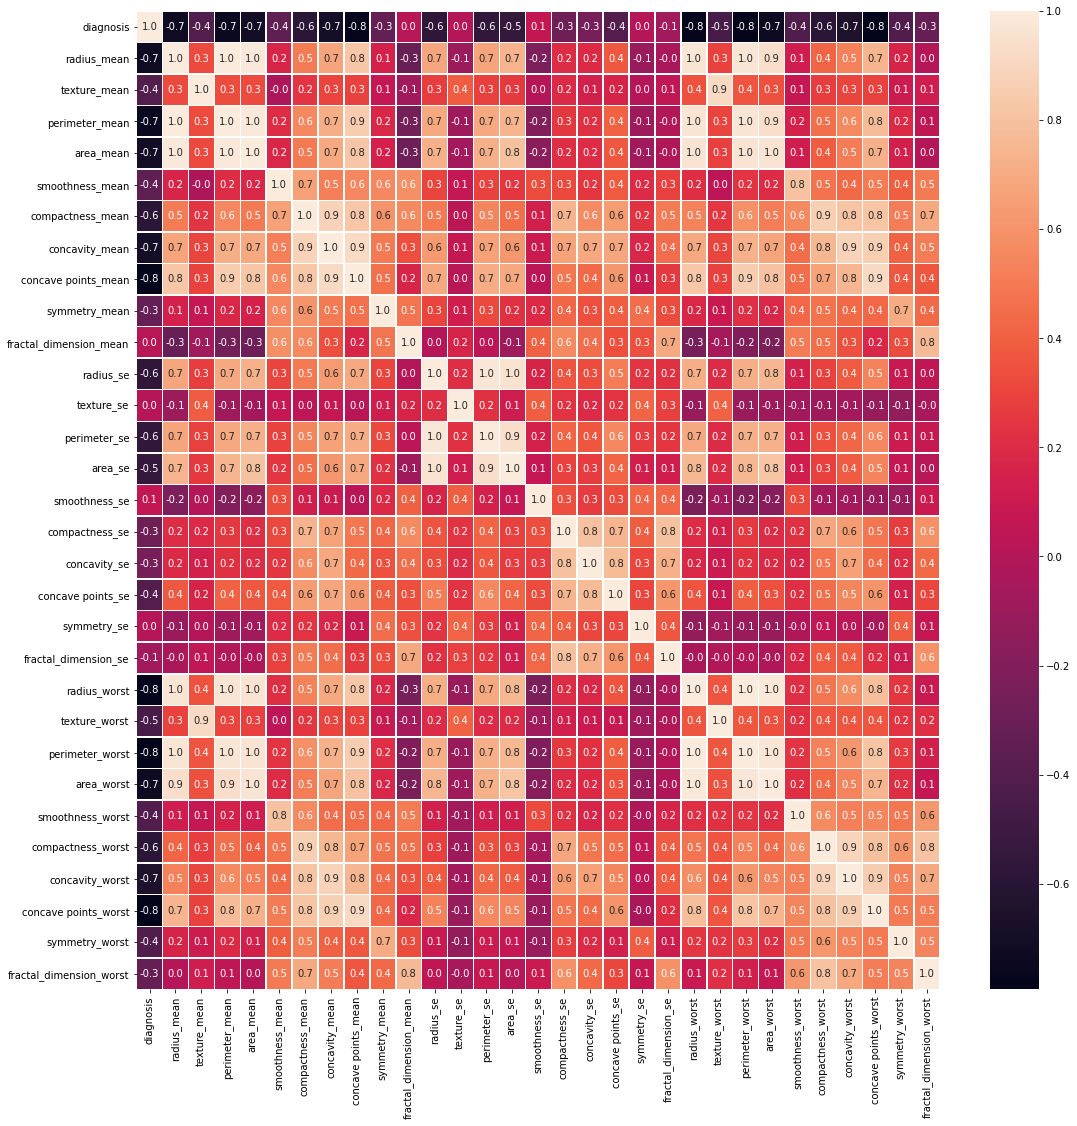

In [5]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [0]:
x = df.drop("diagnosis",axis=1)
y = df['diagnosis']

In [0]:

from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test =train_test_split(x,y,test_size=0.2,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)



In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(x_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[30]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [0]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])

In [12]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
11/11 [==============================] - 0s 18ms/step - loss: 1.5242 - accuracy: 0.4076 - val_loss: 1.2613 - val_accuracy: 0.4386
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 0.9896 - accuracy: 0.5103 - val_loss: 0.8826 - val_accuracy: 0.5702
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 0.6847 - accuracy: 0.6100 - val_loss: 0.6447 - val_accuracy: 0.6228
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.6891 - val_loss: 0.4997 - val_accuracy: 0.6579
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 0.3839 - accuracy: 0.7361 - val_loss: 0.4090 - val_accuracy: 0.6930
Epoch 6/20
11/11 [==============================] - 0s 5ms/step - loss: 0.3142 - accuracy: 0.7566 - val_loss: 0.3502 - val_accuracy: 0.7105
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 0.2693 - accuracy: 0.7713 - val_loss: 0.3095 - val_accuracy: 0.7105
Epoch 8/20
11/11 [=

In [13]:
scores = model.evaluate(x, y, verbose=0)
print(scores[1])

0.3725834786891937


In [20]:
from sklearn.model_selection import train_test_split
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores[1]

accuracy: 84.21%


0.8421052694320679